In [6]:
import matplotlib.pyplot as plt

In [41]:
class LIF:
    
    def __init__(self, threshold=-55, v_rest=-65, v_reset=-70, resist=10, tau=10):
        self.v_reset = v_reset          # reset potential, mV
        self.v_rest = v_rest            # resting potential, mV
        self.R = resist                 # resistance, nS(나노지멘스)
        self.threshold = threshold      # threshold potential, mV
        self.tau = tau                  # tau
        self.membrane = self.v_reset    # 현재 membrane potential, mV
    
    def spike(self, input_vt=0, dt=0.001):
        
        """
        dt(delta t) = 1ms (0.001s)
        
        input_vt : input voltage
        """
        
        is_spike = False
        self.membrane += (-(self.membrane - self.v_rest) + self.R * input_vt) * dt / self.tau
        if self.membrane >= self.threshold:
            is_spike = True
            self.membrane = self.v_reset
            
        spike_record = {
            "spike": is_spike,
            "membrane": self.membrane
        }
        
        return spike_record
        

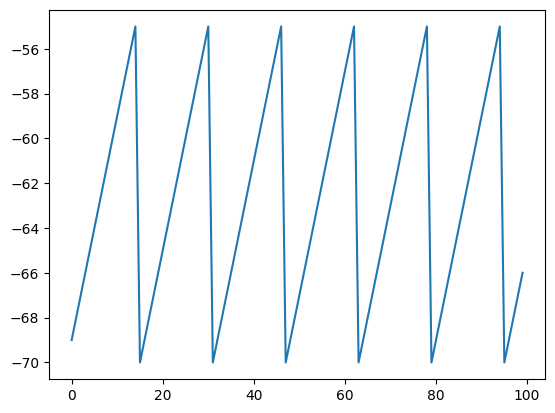

In [45]:
if __name__=="__main__":
  observe_ms = 100 # ms, 0.1초동안 관찰

  tau = 5
  neuron1 = LIF(tau=tau) # 뉴런 생성
  membrane_potential_history = []              # 0.1초동안의 membrane potential을 기록
  dt_history = [i for i in range(observe_ms)]  # 시간(ms)
  
  for ms in range(observe_ms):
    infos = neuron1.spike(input_vt = 500, dt = 0.001)
    membrane_potential_history.append(infos["membrane"])

  plt.plot(dt_history, membrane_potential_history)
  plt.show()
